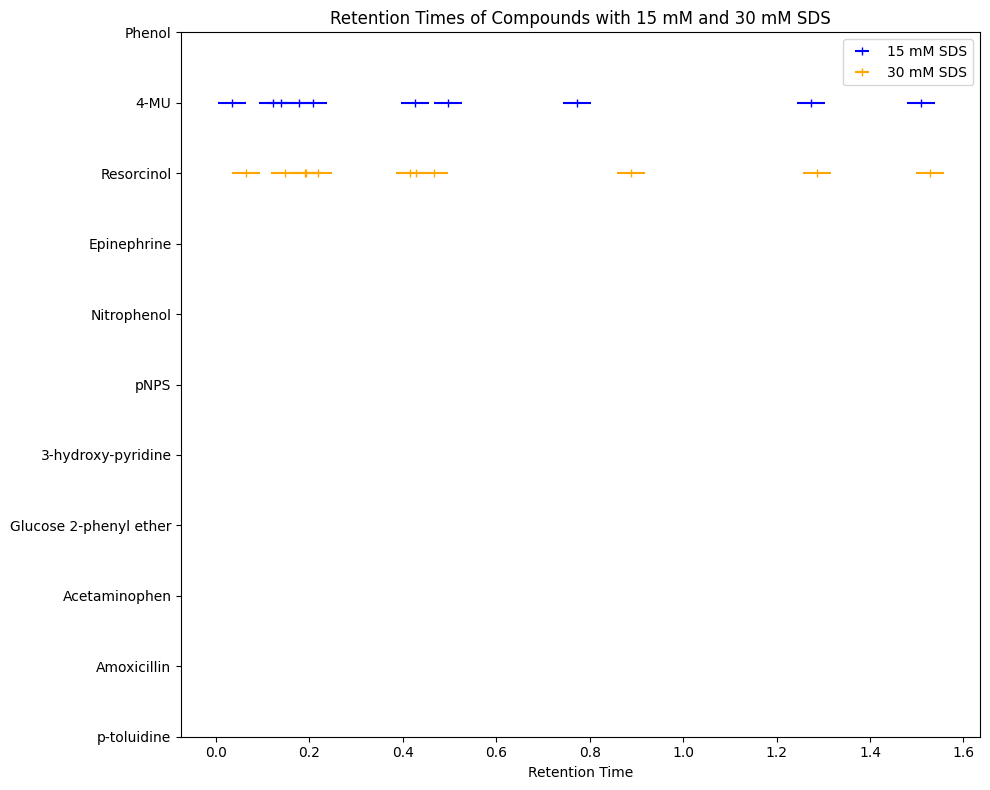

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Compounds corresponding to the retention times
compounds = [
    "Phenol", "4-MU", "Resorcinol", "Epinephrine", "Nitrophenol",
    "pNPS", "3-hydroxy-pyridine", "Glucose 2-phenyl ether", "Acetaminophen",
    "Amoxicillin", "p-toluidine"
]

# Retention times for 15 mM SDS and 30 mM SDS experiments
retention_times_15mM = [
    0.140151515, 0.772614402, 0.178242381, np.nan, 1.273784355,
    1.508492569, 0.497326203, 0.033515732, 0.121565934, 0.426409904, 0.208
]

retention_times_30mM = [
    0.218290119, 0.888324873, 0.192555476, 0.18993994, 1.287279152,
    1.527817404, 0.466470155, 0.064699609, 0.14781675, 0.414695341, 0.427488464
]

# Uncertainty or variability width
uncertainty_width = 0.03
bar_width = 0.4 # width for the separation between the 15mM and 30mM lines
index = np.arange(len(compounds))

# Plot settings
fig, ax = plt.subplots(figsize=(10, 8))

# Plot vertical lines for 15 mM SDS
for rt, y in zip(retention_times_15mM, index):
    ax.errorbar(rt, 1, xerr=uncertainty_width, fmt='|', color='blue', label='15 mM SDS')

# Plot vertical lines for 30 mM SDS
for rt, y in zip(retention_times_30mM, index):
    ax.errorbar(rt, 2, xerr=uncertainty_width, fmt='|', color='orange', label='30 mM SDS')

# Labeling the y-axis with compound names
ax.set_yticks(index)
ax.set_yticklabels(compounds)
ax.invert_yaxis()  # labels read top-to-bottom

# Adding labels and title
ax.set_xlabel('Retention Time')
ax.set_title('Retention Times of Compounds with 15 mM and 30 mM SDS')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles)) # Remove duplicate labels
ax.legend(by_label.values(), by_label.keys())

# Final adjustments and show plot
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


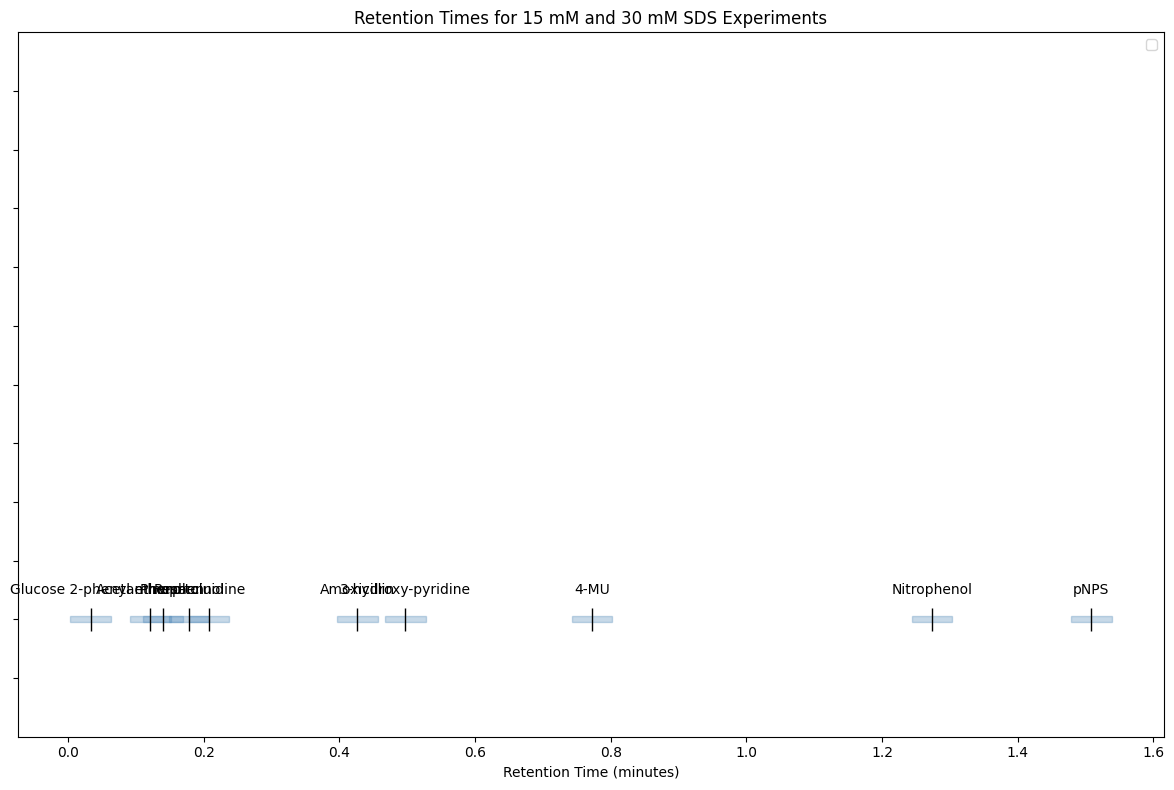

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Compounds corresponding to the retention times
compounds = [
    "Phenol", "4-MU", "Resorcinol", "Epinephrine", "Nitrophenol",
    "pNPS", "3-hydroxy-pyridine", "Glucose 2-phenyl ether", "Acetaminophen",
    "Amoxicillin", "p-toluidine"
]

# Retention times for 15 mM SDS and 30 mM SDS experiments
retention_times_15mM = np.array([
    0.140151515, 0.772614402, 0.178242381, np.nan, 1.273784355,
    1.508492569, 0.497326203, 0.033515732, 0.121565934, 0.426409904, 0.208
])

retention_times_30mM = np.array([
    0.218290119, 0.888324873, 0.192555476, 0.18993994, 1.287279152,
    1.527817404, 0.466470155, 0.064699609, 0.14781675, 0.414695341, 0.427488464
])

# Uncertainty or variability width
uncertainty_width = 0.03

# Plot settings
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(compounds))

# Function to plot the lines, rectangles, and text for each compound
def plot_compounds(ax, times, color, experiment_label):
    # Iterate through each of the compound retention times
    for idx, time in enumerate(times):
        # Check if the retention time is not NaN
        if not np.isnan(time):
            # Draw a vertical line for the retention time
            ax.vlines(time, idx - 0.4, idx + 0.4, colors="black", label=experiment_label if idx == 0 else "", linewidth=2)
            # Draw a rectangle for the error interval
            rect = plt.Rectangle((time - uncertainty_width, idx - 0.3), uncertainty_width * 2, 0.6, color=color, alpha=0.3)
            ax.add_patch(rect)
            # Draw text for the compound name
            ax.text(time, idx, compounds[idx], color="black", ha="center", va="center")

# Plot for 15 mM SDS experiment
#plot_compounds(ax, retention_times_15mM, 'blue', '15 mM SDS')
for idx, time in enumerate(retention_times_15mM):
    # Check if the retention time is not NaN
    if not np.isnan(time):
        # Draw a vertical line for the retention time
        ax.vlines(time, 1 - 0.2, 1 + 0.2, colors="black", linewidth=1)
        # Draw a rectangle for the error interval
        rect = plt.Rectangle((time - uncertainty_width, 1 - 0.05), uncertainty_width * 2, 0.1, color="steelblue", alpha=0.3)
        ax.add_patch(rect)
        # Draw text for the compound name
        ax.text(time, 1+0.5, compounds[idx], color="black", ha="center", va="center")
            
# Plot for 30 mM SDS experiment
#plot_compounds(ax, retention_times_30mM, 'red', '30 mM SDS')

# Customize the y-axis
ax.set_yticks(index)
ax.set_yticklabels(["" for _ in compounds])  # Remove compound names to avoid clutter
ax.set_ylim(-1, len(compounds))

# Customize the x-axis
ax.set_xlabel('Retention Time (minutes)')

# Add title and legend
ax.set_title('Retention Times for 15 mM and 30 mM SDS Experiments')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
